# World Happiness Prediction

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import os

## Daten aufbereiten

In [4]:
#Alle WHI Dateien einlesen und in einen Dataframe concaten
whi_all_years = pd.DataFrame()

for f in os.listdir('../data/WHI'):
    whi_data = pd.read_csv('../data/WHI/' + f)
    whi_all_years = pd.concat([whi_all_years, whi_data], ignore_index=True)

whi_all_years.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 51 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     617 non-null    object 
 1   Region                                      315 non-null    object 
 2   Happiness Rank                              315 non-null    float64
 3   Happiness Score                             315 non-null    float64
 4   Standard Error                              158 non-null    float64
 5   Economy (GDP per Capita)                    315 non-null    float64
 6   Family                                      470 non-null    float64
 7   Health (Life Expectancy)                    315 non-null    float64
 8   Freedom                                     470 non-null    float64
 9   Trust (Government Corruption)               315 non-null    float64
 10  Generosity  

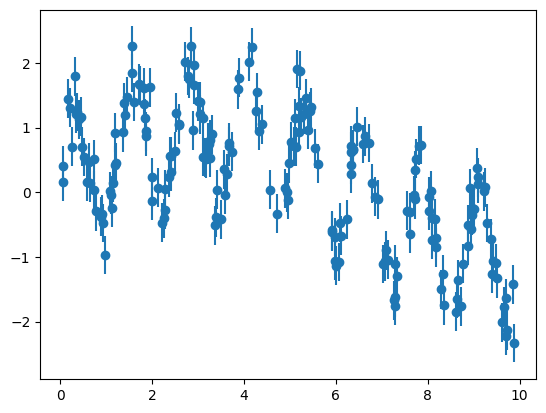

In [4]:
rng = np.random.RandomState(42) #Beispieldaten aus zwei Schwingungen
x = 10 * rng.rand(200)

def model(x, sigma=0.3):
    fast_oscillation = np.sin(5 * x)
    slow_oscillation = np.sin(0.5 * x)
    noise = sigma * rng.randn(len(x))

    return slow_oscillation + fast_oscillation + noise

y = model(x)
plt.errorbar(x, y, 0.3, fmt='o'); # Konfidenzintervall

## Random Forest Regressor anwenden

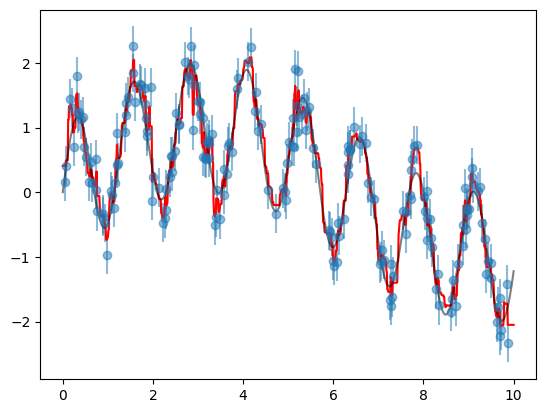

In [3]:
from sklearn.ensemble import RandomForestRegressor #Random Forest ist gezackt, sehr flexibel, ohne Parameter!
forest = RandomForestRegressor(200) # Anzahl der Bäume
forest.fit(x[:, None], y)

xfit = np.linspace(0, 10, 1000)
yfit = forest.predict(xfit[:, None])
ytrue = model(xfit, sigma=0)

plt.errorbar(x, y, 0.3, fmt='o', alpha=0.5)
plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);